In [3]:
## Outside libraries
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
import pandas as pd
import os
import pandas as pd 
import numpy as np 
import itertools
from sklearn.metrics import mean_squared_error as mse
#Custom Functions
import config
import Starting
import Forecast_01
import trainandtest
import transform
import AlgoArima
import HoltWinters
import AlgoProphet
import Forecast_01

2021-12-17 01:06:59.685 ERROR   fbprophet.plot: Importing plotly failed. Interactive plots will not work.
2021-12-17 01:07:00.604 
  command:

    streamlit run /Users/parthshah/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


Started
Extraction_started
Flags data shape: (2557, 8)


2021-12-17 01:07:01.441 NumExpr defaulting to 8 threads.


Sales data shape: (12798, 3)
Min_data 2014-04-01 00:00:00
Max_data 2020-01-31 00:00:00
Starting forecast for CATPB:  South 1
Starting ARIMA
Starting ARIMAX
{'South 1':   Algorithm      MAPE
0     ARIMA  0.009750
1    ARIMAX  0.900017}
Best algorithm for forecasting  South 1  is  ARIMA , with error:  0.009749618989201717
Starting forecast for CATPB:  West
Starting ARIMA
Starting ARIMAX
{'South 1':   Algorithm      MAPE
0     ARIMA  0.009750
1    ARIMAX  0.900017, 'West':   Algorithm      MAPE
0     ARIMA  3.490895
1    ARIMAX  0.467090}
Best algorithm for forecasting  West  is  ARIMAX , with error:  0.46708978835002213
Starting forecast for CATPB:  East
Starting ARIMA
Starting ARIMAX
{'South 1':   Algorithm      MAPE
0     ARIMA  0.009750
1    ARIMAX  0.900017, 'West':   Algorithm      MAPE
0     ARIMA  3.490895
1    ARIMAX  0.467090, 'East':   Algorithm      MAPE
0     ARIMA  8.451941
1    ARIMAX  3.350787}
Best algorithm for forecasting  East  is  ARIMAX , with error:  3.3507873714493

In [2]:
algotable,errortable = Starting.forecast(category = 'J', n=3)

Started
Extraction_started
Flags data shape: (2557, 24)
Sales data shape: (12798, 3)
Min_data 2014-04-01 00:00:00
Max_data 2020-01-31 00:00:00
Starting forecast for CATPB:  South 1
Starting ARIMA
Starting ARIMAX
Starting SARIMA


2021-12-17 00:47:08.403 NumExpr defaulting to 8 threads.


Starting Holt Winters
MAPE for HoltWinters: 2.009314865384655
Starting Prophet
prophet__An error occured while fitting prophet


KeyboardInterrupt: 

In [3]:
errortable

,Algorithm,MAPE,mse
0,ARIMA,4.321273,1.631805e+15
1,ARIMAX,8.304755,7.861075e+15
2,SARIMA,0.154671,1.010349e+15
3,SARIMAX,1.113031,6.549178e+14
4,HOLT-WINTERS-AAD,1.487307,1.487307e+00
5,Prophet(seas-Add),8.437991,2.402612e+15


In [ ]:
category= 'J'
level="ID"
flagsFromPath=True,
frequency="W"
n=1
salesFromPath=True
transformation=""
confidencelevel=0.95

In [ ]:
salesDF , flagsDF = Forecast_01.dataExtraction(category, level,salesFromPath,
                                                        flagsFromPath)

In [ ]:
import os
os.getcwd()

In [15]:
data = pd.read_csv('/Users/parthshah/Documents/GitHub/TimeSeries/TimeSeries/Data/train.csv')

In [4]:
data = pd.read_excel('Sales_Data.xlsx')

In [5]:
data

,DATE,ID,SALES
0,2014-04-01,East,913268.88
1,2014-04-02,East,962291.76
2,2014-04-03,East,982599.00
3,2014-04-04,East,1078800.10
4,2014-04-05,East,1735866.90
...,...,...,...
12793,2020-01-27,West,4051107.27
12794,2020-01-28,West,4427279.87
12795,2020-01-29,West,4889100.82
12796,2020-01-30,West,6080588.90


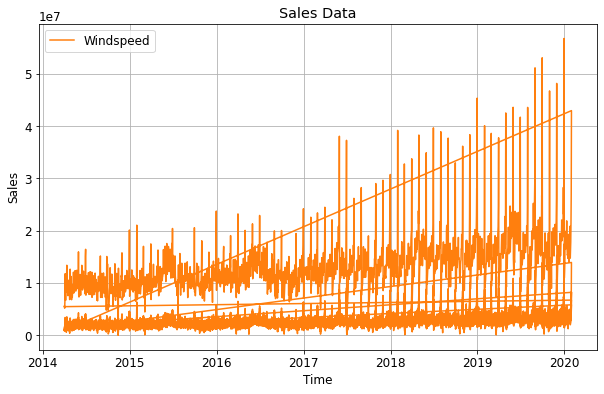

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(data.DATE, data.SALES, color='tab:orange', label='Windspeed')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales Data')
ax.grid(True)
ax.legend(loc='upper left');

In [9]:
df = data.rename(columns={'DATE':'index'}).set_index('index')

In [10]:
df

,ID,SALES
index,,
2014-04-01,East,913268.88
2014-04-02,East,962291.76
2014-04-03,East,982599.00
2014-04-04,East,1078800.10
2014-04-05,East,1735866.90
...,...,...
2020-01-27,West,4051107.27
2020-01-28,West,4427279.87
2020-01-29,West,4889100.82
